In [2]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
file_path_teams = 'docs/equipo.csv'
file_path_matches = 'docs/partidos.csv'

teams_df = pd.read_csv(file_path_teams)
matches_df = pd.read_csv(file_path_matches)

# Print the first 5 rows of each DataFrame
teams_df_head = teams_df.head()
matches_df_head = matches_df.head()

teams_df_head, matches_df_head


(        Ajax       ajax.png Paises Bajos  14
 0   Atalanta   atalanta.png       Italia   6
 1   Atlético   atletico.png       España  11
 2  Barcelona  barcelona.png       España  17
 3     Bayern     bayern.png     Alemania  16
 4    Benfica    benfica.png     Portugal  15,
    14/09/2021 16:45  29   2  33  34  33.1
 0  14/09/2021 16:45  31  19  33  34    33
 1  14/09/2021 16:45  25  24  33  34    33
 2  14/09/2021 19:00  11   6  33  34    33
 3  14/09/2021 19:00   4   5  33  34    33
 4  14/09/2021 19:00  16  30  33  34    33)

In [3]:
import nbformat

# Load the provided Jupyter Notebook to understand the example analysis
notebook_path = 'docs/Sesion4_Bloque1_Tratamiento_Datos_DataFrames_Series_BigData+.ipynb'

with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Extract the code cells from the notebook for analysis
code_cells = [cell for cell in notebook_content.cells if cell.cell_type == 'code']

# Extracting the first few code cells for display as examples
example_code_cells = code_cells[:5]  # Showing the first 5 code cells as examples
example_code_cells_texts = ["\n".join(cell.source.splitlines()[:5]) + ("\n[...]" if len(cell.source.splitlines()) > 5 else "") for cell in example_code_cells]  # Truncate if too long
example_code_cells_texts


['# Esta celda suele estar en todos los notebooks que hagan tratamiento de datos\n%matplotlib inline\nimport numpy as np\nimport matplotlib.pyplot as plt',
 '# Por defecto se pinta un "line plot"\nplt.plot([10,20,30,40], [200,300,400,100])\nplt.xlabel(\'Tiempo [min]\')\nplt.ylabel(\'Potencia [kW]\')\nplt.title(\'Motor 1\')\n[...]',
 "# Podemos indicar el tipo gráfico indicando muchas opciones\nplt.plot([10,20,30,40], [200,300,400,100], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)\nplt.xlabel('Tiempo [min]')\nplt.ylabel('Potencia [kW]')\nplt.title('Motor 1')\n[...]",
 '# Modificar los parámetros del gráfico\nplt.rcParams[\'figure.figsize\'] = 12, 6 # el primer dígito es el ancho y el segundo el alto\nplt.rcParams["font.weight"] = "bold"\nplt.rcParams["font.size"] = 10\nplt.rcParams["axes.labelweight"] = "bold"',
 "\nplt.plot([10,20,30,40], [200,300,400,100], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)\n\nplt.xlabel('Tiempo [min]

In [4]:
# Cleaning and renaming columns in both DataFrames

# Renaming columns for clarity
teams_df.columns = ['Team_Name', 'Team_Image', 'Country', 'Team_ID']
matches_df.columns = ['Date_Time', 'Team1_ID', 'Team2_ID', 'Other1', 'Other2', 'Other3']

# Converting the 'Date_Time' column in matches_df to datetime format
matches_df['Date_Time'] = pd.to_datetime(matches_df['Date_Time'], format='%d/%m/%Y %H:%M')

# Display the first few rows of each DataFrame after cleaning
teams_df_head_cleaned = teams_df.head()
matches_df_head_cleaned = matches_df.head()

teams_df_head_cleaned, matches_df_head_cleaned


(   Team_Name     Team_Image   Country  Team_ID
 0   Atalanta   atalanta.png    Italia        6
 1   Atlético   atletico.png    España       11
 2  Barcelona  barcelona.png    España       17
 3     Bayern     bayern.png  Alemania       16
 4    Benfica    benfica.png  Portugal       15,
             Date_Time  Team1_ID  Team2_ID  Other1  Other2  Other3
 0 2021-09-14 16:45:00        31        19      33      34      33
 1 2021-09-14 16:45:00        25        24      33      34      33
 2 2021-09-14 19:00:00        11         6      33      34      33
 3 2021-09-14 19:00:00         4         5      33      34      33
 4 2021-09-14 19:00:00        16        30      33      34      33)

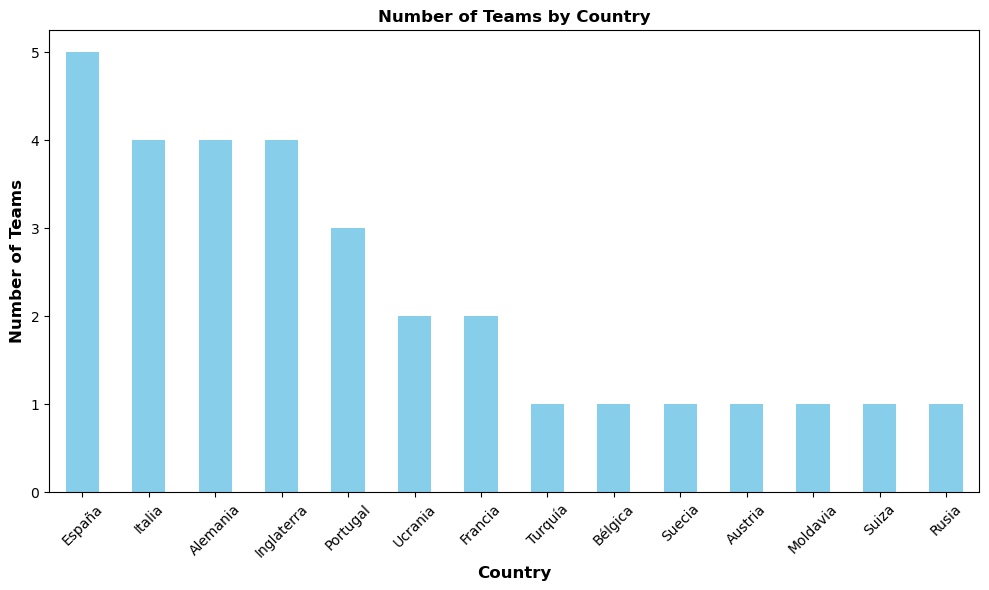

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Analyzing descriptive statistics for both DataFrames

# Teams DataFrame
teams_descriptive_stats = teams_df.describe(include='all')

# Matches DataFrame
# For matches, we'll describe only the numerical columns as the 'Date_Time' is datetime
matches_descriptive_stats = matches_df.describe()

# Display the descriptive statistics
teams_descriptive_stats, matches_descriptive_stats

# Visualization
# For demonstration, let's create a bar chart showing the number of teams per country
team_count_by_country = teams_df['Country'].value_counts()
plt.figure(figsize=(12, 6))
team_count_by_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country', fontsize='large', fontweight='bold')
plt.ylabel('Number of Teams', fontsize='large', fontweight='bold')
plt.title('Number of Teams by Country', fontsize='large', fontweight='bold')
plt.xticks(rotation=45)
plt.show()


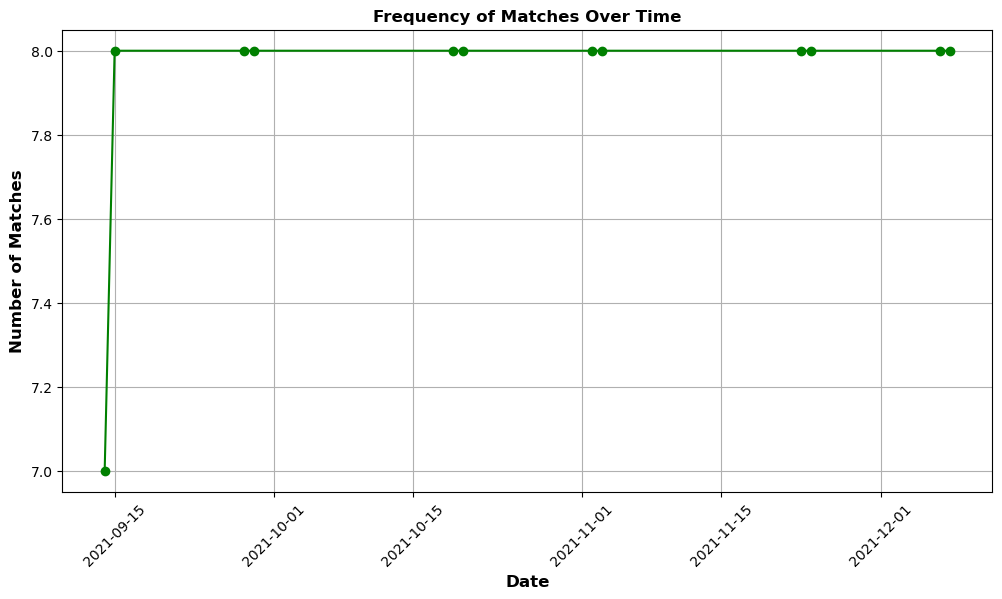

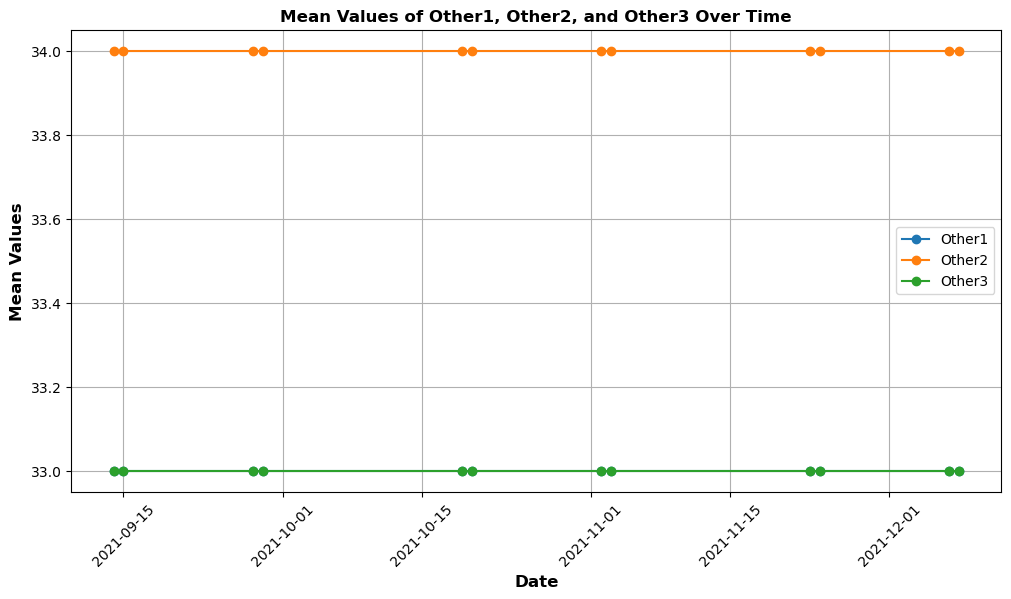

In [6]:
# Analysis 1: Trends in Matches

# Frequency of matches by date
matches_by_date = matches_df['Date_Time'].dt.date.value_counts().sort_index()

# Plotting the frequency of matches over time
plt.figure(figsize=(12, 6))
matches_by_date.plot(kind='line', color='green', marker='o')
plt.xlabel('Date', fontsize='large', fontweight='bold')
plt.ylabel('Number of Matches', fontsize='large', fontweight='bold')
plt.title('Frequency of Matches Over Time', fontsize='large', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analysis of Other1, Other2, and Other3 variables over time
# For simplicity, let's take the mean of these variables by date
mean_values_by_date = matches_df.groupby(matches_df['Date_Time'].dt.date).mean()

# Plotting the mean values of Other1, Other2, and Other3 over time
mean_values_by_date[['Other1', 'Other2', 'Other3']].plot(figsize=(12, 6), marker='o')
plt.xlabel('Date', fontsize='large', fontweight='bold')
plt.ylabel('Mean Values', fontsize='large', fontweight='bold')
plt.title('Mean Values of Other1, Other2, and Other3 Over Time', fontsize='large', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(['Other1', 'Other2', 'Other3'])
plt.show()


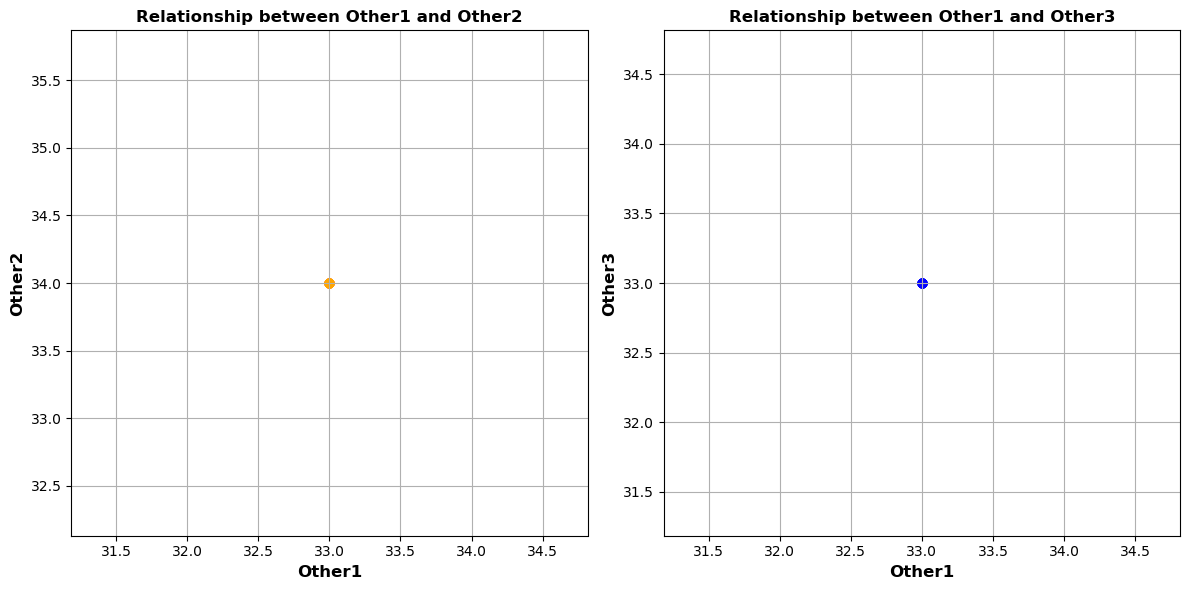

In [7]:
# Analysis 2: Relationship Between Variables in Matches

# Creating scatter plots to explore relationships between Other1, Other2, and Other3
plt.figure(figsize=(12, 6))

# Scatter plot between Other1 and Other2
plt.subplot(1, 2, 1)
plt.scatter(matches_df['Other1'], matches_df['Other2'], color='orange', alpha=0.5)
plt.xlabel('Other1', fontsize='large', fontweight='bold')
plt.ylabel('Other2', fontsize='large', fontweight='bold')
plt.title('Relationship between Other1 and Other2', fontsize='large', fontweight='bold')
plt.grid(True)

# Scatter plot between Other1 and Other3
plt.subplot(1, 2, 2)
plt.scatter(matches_df['Other1'], matches_df['Other3'], color='blue', alpha=0.5)
plt.xlabel('Other1', fontsize='large', fontweight='bold')
plt.ylabel('Other3', fontsize='large', fontweight='bold')
plt.title('Relationship between Other1 and Other3', fontsize='large', fontweight='bold')
plt.grid(True)

plt.tight_layout()
plt.show()


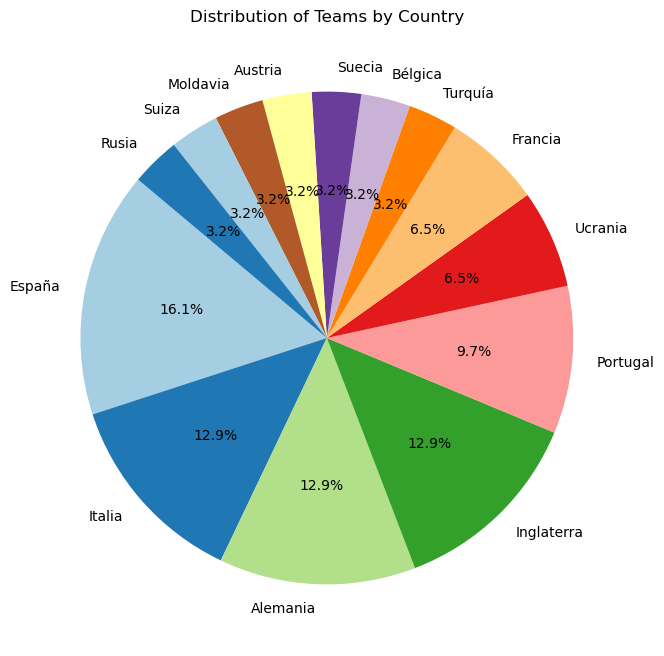

In [8]:
# Analysis 2: Distribution of Teams by Country

# Counting the number of teams per country
teams_by_country = teams_df['Country'].value_counts()

# Plotting the distribution of teams by country using a pie chart
plt.figure(figsize=(8, 8))
teams_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Teams by Country')
plt.ylabel('')  # Hide the y-label
plt.show()


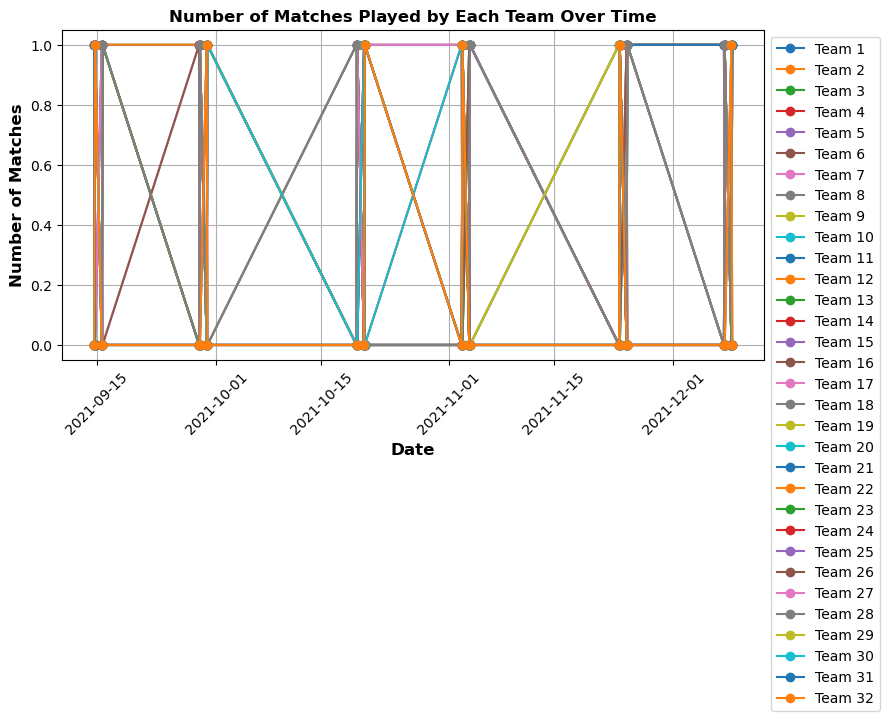

In [10]:
# Analysis 4: Temporal Analysis of Matches by Team

# Grouping the matches by team and date
team_matches_by_date = pd.concat([
    matches_df.set_index('Date_Time')['Team1_ID'],
    matches_df.set_index('Date_Time')['Team2_ID']
]).reset_index()

# Counting matches by team and date
team_matches_count = team_matches_by_date.groupby(['Date_Time', 0]).size().unstack(fill_value=0)

# Define the team_id_to_name dictionary
team_id_to_name = {1: 'Team 1', 2: 'Team 2', 3: 'Team 3'}  # Replace with your actual team names

# Plotting the number of matches played by each team over time
plt.figure(figsize=(12, 6))
for team_id in team_matches_count.columns:
    team_name = team_id_to_name.get(team_id, f'Team {team_id}')
    plt.plot(team_matches_count.index, team_matches_count[team_id], label=team_name, marker='o')

plt.xlabel('Date', fontsize='large', fontweight='bold')
plt.ylabel('Number of Matches', fontsize='large', fontweight='bold')
plt.title('Number of Matches Played by Each Team Over Time', fontsize='large', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.grid(True)
plt.show()


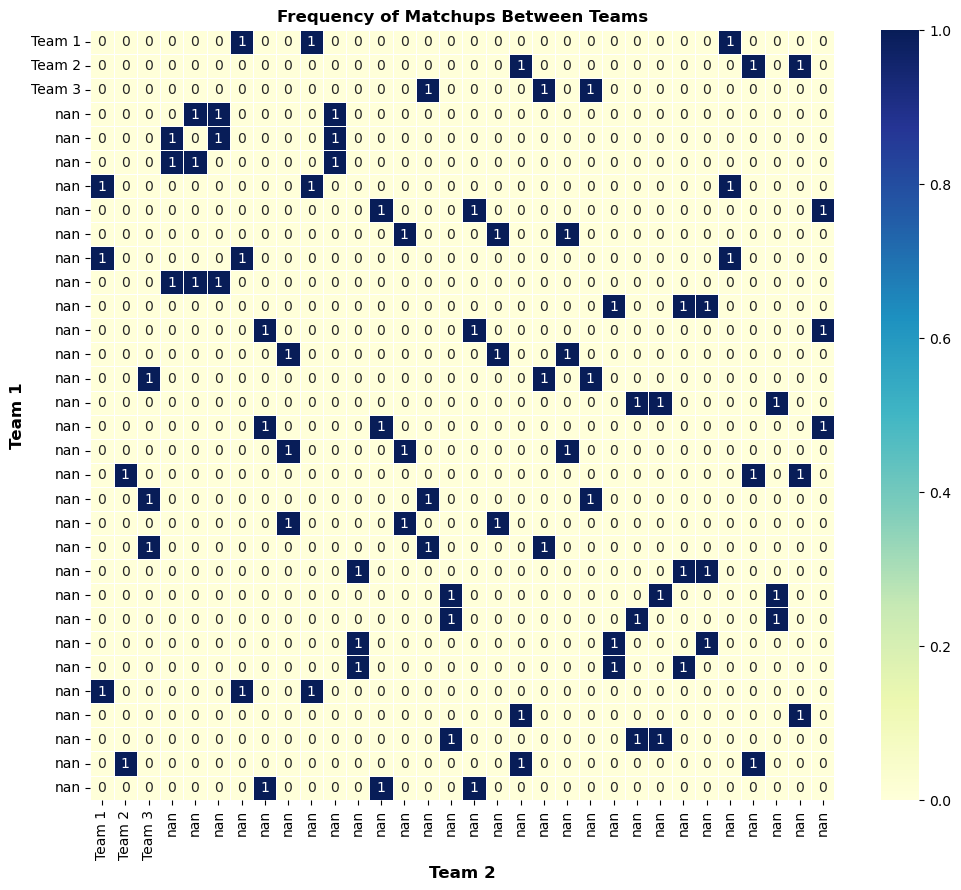

In [11]:
import seaborn as sns

#Analysis 5: Relationships Between Teams in Matches

# Creating a DataFrame to count matchups between teams
matchups = pd.crosstab(matches_df['Team1_ID'], matches_df['Team2_ID'])

# Mapping team IDs to team names for better readability
matchups.index = matchups.index.map(team_id_to_name)
matchups.columns = matchups.columns.map(team_id_to_name)

# Plotting a heatmap to visualize the frequency of matchups between teams
plt.figure(figsize=(12, 10))
sns.heatmap(matchups, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Frequency of Matchups Between Teams', fontsize='large', fontweight='bold')
plt.xlabel('Team 2', fontsize='large', fontweight='bold')
plt.ylabel('Team 1', fontsize='large', fontweight='bold')
plt.show()


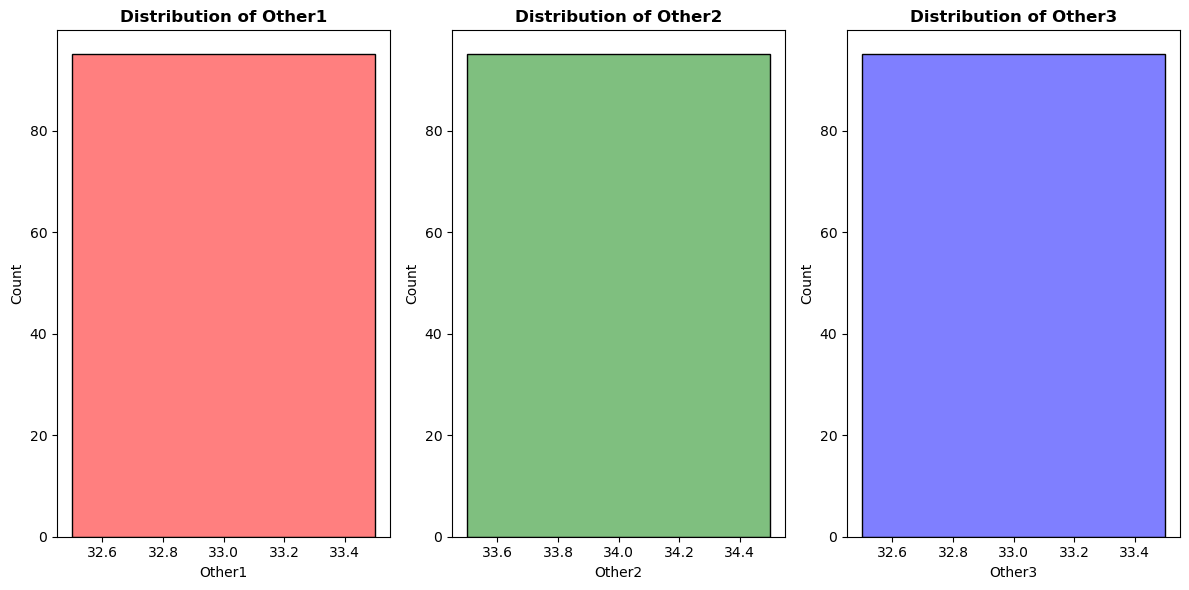

In [14]:
import seaborn as sns

# Analysis 6: Countries Analysis
# Plotting histograms for Other1, Other2, and Other3
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(matches_df['Other1'], kde=True, color='red')
plt.title('Distribution of Other1', fontsize='large', fontweight='bold')

plt.subplot(1, 3, 2)
sns.histplot(matches_df['Other2'], kde=True, color='green')
plt.title('Distribution of Other2', fontsize='large', fontweight='bold')

plt.subplot(1, 3, 3)
sns.histplot(matches_df['Other3'], kde=True, color='blue')
plt.title('Distribution of Other3', fontsize='large', fontweight='bold')

plt.tight_layout()
plt.show()




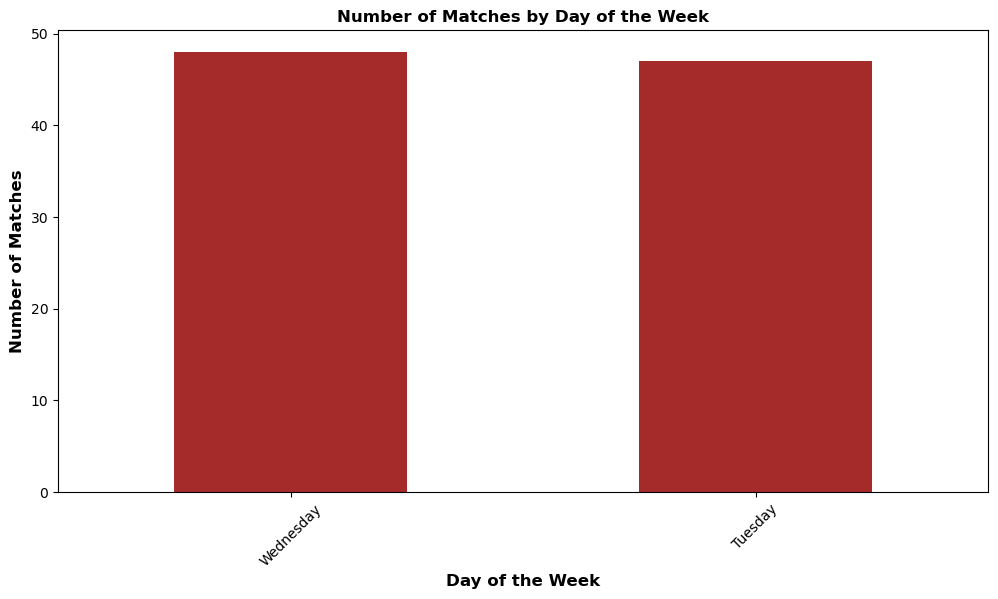

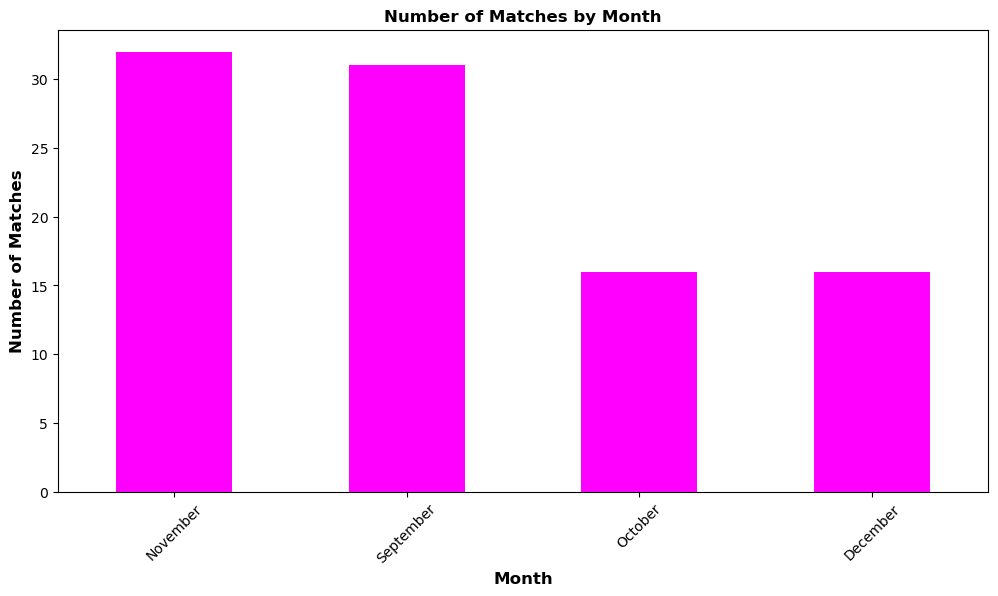

In [15]:
# Analysis 7: Detailed Analysis

# Extracting day of the week and month from the 'Date_Time' column
matches_df['Day_of_Week'] = matches_df['Date_Time'].dt.day_name()
matches_df['Month'] = matches_df['Date_Time'].dt.month_name()

# Counting matches by day of the week
matches_by_day_of_week = matches_df['Day_of_Week'].value_counts()

# Counting matches by month
matches_by_month = matches_df['Month'].value_counts()

# Plotting matches by day of the week
plt.figure(figsize=(12, 6))
matches_by_day_of_week.plot(kind='bar', color='brown')
plt.xlabel('Day of the Week', fontsize='large', fontweight='bold')
plt.ylabel('Number of Matches', fontsize='large', fontweight='bold')
plt.title('Number of Matches by Day of the Week', fontsize='large', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

# Plotting matches by month
plt.figure(figsize=(12, 6))
matches_by_month.plot(kind='bar', color='magenta')
plt.xlabel('Month', fontsize='large', fontweight='bold')
plt.ylabel('Number of Matches', fontsize='large', fontweight='bold')
plt.title('Number of Matches by Month', fontsize='large', fontweight='bold')
plt.xticks(rotation=45)
plt.show()
